# Kidnapped Vehicle Project


## Visualisation

In [4]:
%matplotlib inline

In [68]:
import pandas as pd
import matplotlib.animation as manimation
import matplotlib.pyplot as plt
import numpy as np

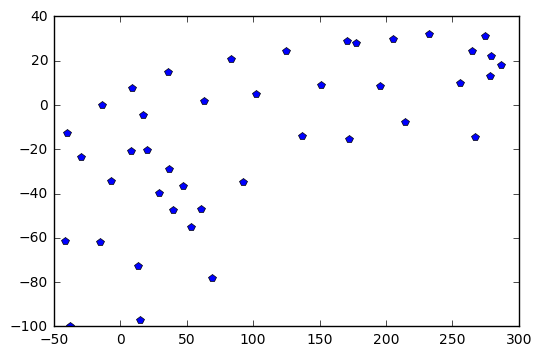

In [14]:
def read_landmarks():
    return pd.read_table('data/map_data.txt', sep='\s+', names=['x', 'y', 'id'])

def plot_landmarks(landmarks):
    plt.plot(landmarks['x'], landmarks['y'], 'p')

LANDMARKS = read_landmarks()
plot_landmarks(LANDMARKS)

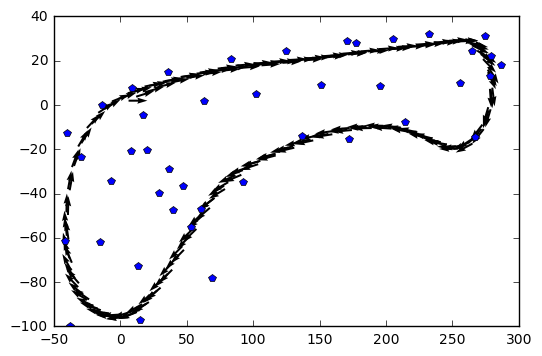

In [91]:
def read_ground_truth():
    return pd.read_table('data/gt_data.txt', sep='\s+', names=['x', 'y', 'theta'])

def plot_ground_truth_quiver(ground_truth, **kwargs):
    u = np.cos(ground_truth['theta'])
    v = np.sin(ground_truth['theta'])
    plt.quiver(ground_truth['x'], ground_truth['y'], u, v, **kwargs)
    
GROUND_TRUTH = read_ground_truth()
plot_ground_truth_quiver(GROUND_TRUTH.iloc[0::13])
plot_landmarks(LANDMARKS)

In [65]:
# The trace just prints x y theta w, one line per update.
def read_trace():
    time = 0
    frames = []
    with open('data/trace.txt') as file:
        for line in file:
            data = [float(word) for word in line.split()]
            assert len(data) % 4 == 0
            data = np.array(data).reshape(-1,4)
            times = np.ones((data.shape[0], 1)) * time
            frames.append(
                pd.DataFrame(
                    np.hstack([times, data]),
                    columns=['t', 'x', 'y', 'theta', 'w']))
            time += 1
    return pd.concat(frames)
    
TRACE = read_trace()
TRACE.head()

,t,x,y,theta,w
0,0.0,6.54332,1.98342,0.012649,1.021750e-12
1,0.0,5.43970,2.50481,0.013809,1.770800e-17
2,0.0,6.30103,2.72035,0.012820,3.096030e-17
3,0.0,6.03783,2.39137,0.009779,8.027860e-06
4,0.0,5.36814,2.56999,0.001670,1.931560e-26


In [ ]:
def plot_trace(trace, size=480, arrow_scale=100, step=4):
    FFMPEGWriter = manimation.writers['ffmpeg']
    metadata = dict(
        title='Udacity Kidnapped Vehicle Project',
        artist='John Lees-Miller',
    )
    writer = FFMPEGWriter(fps=15, metadata=metadata)

    fig = plt.figure()
    pad = 10
    plt.xlim(np.min(GROUND_TRUTH['x']) - pad,
             np.max(GROUND_TRUTH['x']) + pad)
    plt.ylim(np.min(GROUND_TRUTH['y']) - pad,
             np.max(GROUND_TRUTH['y']) + pad)
    
    end_time = int(np.max(trace['t']))
    with writer.saving(fig, "data/trace.mp4", size):
        for time in range(0, end_time, step):
            trace_time = trace.loc[trace['t'] == time]
            u = np.cos(trace_time['theta'])
            v = np.sin(trace_time['theta'])
            plot_landmarks(LANDMARKS)
            plt.quiver(trace_time['x'], trace_time['y'], u, v,
                       color='r', width=0.001, scale=arrow_scale)
            plot_ground_truth_quiver(GROUND_TRUTH.loc[time],
                                     width=0.001, scale=arrow_scale)
            
            plt.axes([.55, .25, .3, .2])
            plt.xlim(
                GROUND_TRUTH.loc[time]['x'] - 5,
                GROUND_TRUTH.loc[time]['x'] + 5)
            plt.ylim(
                GROUND_TRUTH.loc[time]['y'] - 5,
                GROUND_TRUTH.loc[time]['y'] + 5)
            plt.quiver(trace_time['x'], trace_time['y'], u, v,
                       color='r', width=0.005, scale=arrow_scale / 5)
            plot_ground_truth_quiver(GROUND_TRUTH.loc[time],
                                     width=0.005, scale=arrow_scale / 5)
                        
            writer.grab_frame()
            plt.clf()
plot_trace(TRACE)